# RoBERTa(A Robustly Optimized BERT Pretraining Approach)
- Facebook AI에서 개발한 BERT기반의 개선된 사전 학습 언어 모델
- RoBERTa는 BERT와 동일한 Transformer 기반 아키텍처를 사용
- BERT 보다 성능을 향상시키기 위해 여러 사전 학습 전략을 수정
    - BERT의 사전 학습 과정에 몇 가지 주요 변경사항을 적용해 성능 향상
    - 더 많은 데이터와 컴퓨팅 자원을 활용하여 더 강력한 모델을 구축



## RoBERTa의 사전 학습 전략
- 확장된 학습 데이터
> BERT보다 약 10배 많은 데이터를 사용하여 학습
- Next Sentence Prediction(NSP) 제거
> NSP 작업이 모델 성능에 실질적인 영향을 미치지 않는다는 것을 확인
- Dynamic Masking
> 각 학습 반복(epoch)마다 동일한 텍스트에서 다른 위치에 마스크를 적용하여 학습 데이터의 다양성을 증가
- 긴 학습 과정
> RoBERTa는 더 긴 시간 동안 학습되며, 더 많은 에폭(epoch)을 사용
    


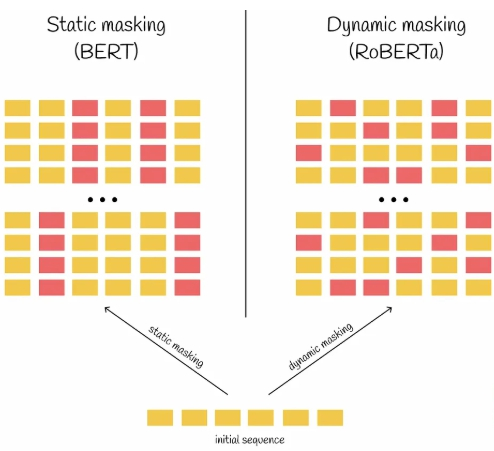

# ALBERT(A Lite BERT for Self-supervised Learning of Language Representations)
- Google Research에서 개발한 BERT 기반의 경량화된 모델로, 모델 크기를 줄이고 학습 효율성을 높이면서도 성능을 유지하거나 향상시키기 위해 설계
- 기존 BERT의 한계를 해결하기 위해 여러 최적화 기법을 적용
- BERT의 문제
    - 모델의 크기가 너무 크면 out of memory 발생
    - 학습에 필요한 시간이 너무 오래 걸림
- ALBERT는 몇 가지 새로운 아이디어로 BERT의 문제를 해결한 모델

## ALBERT의 주요 목표
- 효율적인 메모리 사용
> BERT의 대규모 파라미터 문제를 해결하여 메모리 사용량을 줄임
- 학습 속도 향상
> 경량화된 구조로 학습 시간을 단축
- 성능 유지 또는 향상
> 경량화와 동시에 기존 BERT의 성능을 유지하거나 향상

## Cross-Layer Parameter Sharing
- BERT에서는 각 레이어가 별도의 파라미터를 가지지만, ALBERT는 모든 레이어 간 파라미터를 공유
- 동일한 가중치를 여러 레이어에서 재사용하여 모델 크기를 줄임


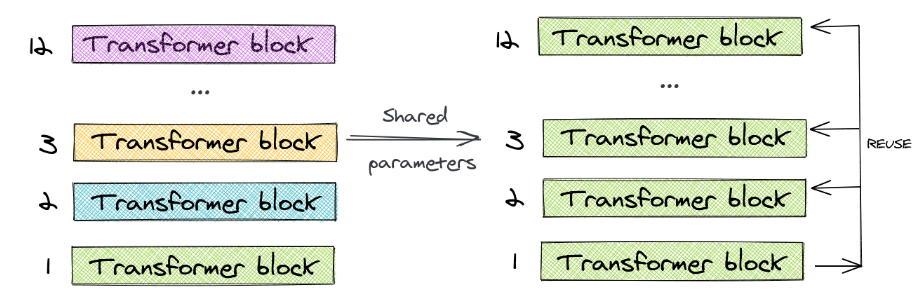

## Sentence-Order Prediction(SOP)
- BERT에서 사용된 Next Sentence Prediction (NSP) 대신 ALBERT는 Sentence Order Prediction (SOP) 작업을 도입
- 문장 순서가 올바른지 예측하는 작업


## Factorized Embedding Parameterization
- 기존 BERT에서는 임베딩 크기(예: 768)가 모델 크기를 크게 증가시키는 요인
- 큰 차원에 임베딩(V X H)으로 투영하는 대신 낮은 차원에 임베딩(V X E)으로 투영하고 히든 공간(E X H)으로 투영함

### BERT 임베딩 방식

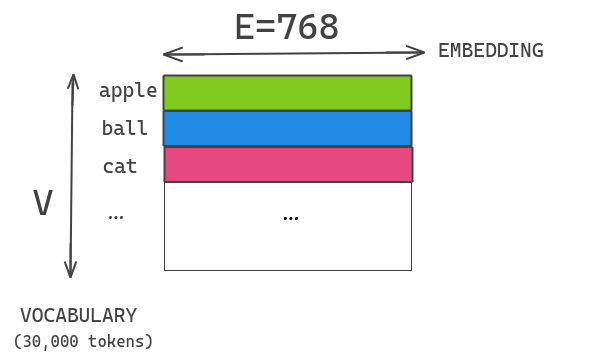

### ALBERT 임베딩 방식

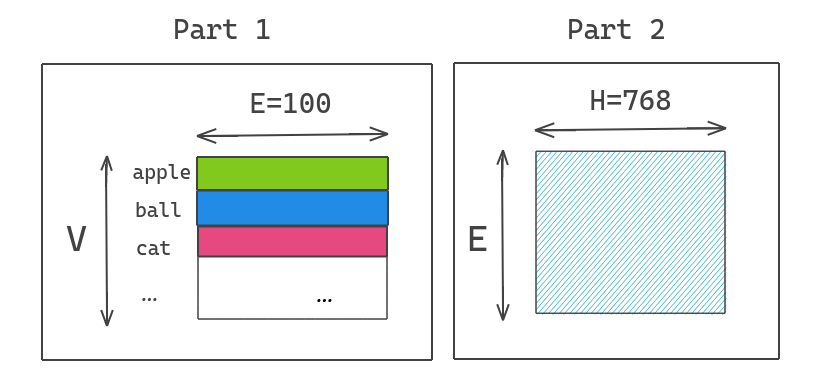

# ELECTRA(Efficiently Learning an Encoder that Classifies Token Replacements Accurately)
- ELECTRA는 Google Research에서 제안한 NLP 모델
- ELECTRA는 BERT와 같은 Transformer 기반 모델
- 기존 사전 학습 방식 MLM 대신 RTD 라는 새로운 학습 방식을 도입

## RTD(Replaced Token Detection)
- 교체한 토큰 탐지 방식으로 사전 학습
- 생성자(Generator)가 마스킹된 토큰을 예측하면 판별자(Discriminator)가 해당 토큰이 맞는지 아닌지를 판별하도록 모델을 학습
- Generator
    - 입력 텍스트에서 일부 토큰을 마스킹한 후, 해당 마스크를 채우는 방식으로 작동
- Discriminator
    - Generator가 생성한 토큰이 원래의 토큰인지 아니면 대체된 토큰인지 구분하는 역할을 수행

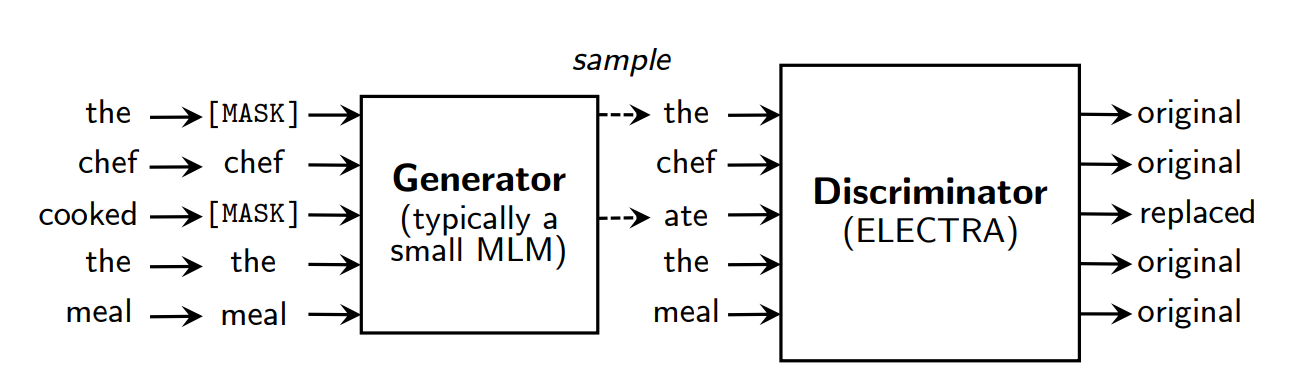

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "../data/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
train = pd.read_csv(f"{DATA_PATH}review_train.csv")
test = pd.read_csv(f"{DATA_PATH}review_test.csv")

train.shape, test.shape

((2000, 3), (1000, 2))

In [54]:
train.head()

,id,review,target
0,train_0,이런 최고의 영화를 이제서야 보다니,1
1,train_1,안봤지만 유승준나와서 비추.,0
2,train_2,시대를 못 따라간 연출과 촌스러운 영상미.,0
3,train_3,원소전 굿,1
4,train_4,ㅋㅋㅋㅋ 개봉영화평점단사람이1명 ㅋㅋㅋㅋ,1


In [55]:
model_name = "WhitePeak/bert-base-cased-Korean-sentiment"
# model_name = "klue/roberta-base"
# model_name = "lots-o/ko-albert-base-v1"
# model_name = "Copycats/koelectra-base-v3-generalized-sentiment-analysis"

# AutoModel 클래스
- 트랜스포머의 기본 출력 반환 모델 로드
- 텍스트 분류나 자연어 생성 등 특정 작업을 위한 헤드(추가 레이어)가 포함되지 않음

In [56]:
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/895 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [57]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [58]:
tokenizer

BertTokenizerFast(name_or_path='WhitePeak/bert-base-cased-Korean-sentiment', vocab_size=119547, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [59]:
tokenizer.model_max_length = 512
tokenizer.model_max_length

512

In [60]:
tmp = tokenizer(train["review"][0])
tmp

{'input_ids': [101, 80956, 83491, 10459, 42428, 11513, 9638, 17730, 12424, 21711, 106154, 25503, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [61]:
train_arr = train["review"].to_numpy()
test_arr = test["review"].to_numpy()
target = train["target"].to_numpy().reshape(-1, 1)

train_arr.shape, test_arr.shape, target.shape

((2000,), (1000,), (2000, 1))

# 데이터셋 클래스

In [62]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, tokenizer, x, y=None):
        self.tokenizer = tokenizer
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        item = {}
        item["x"] = self.__tokenizer(self.x[idx])
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])

        return item

    def __tokenizer(self, text):
        result = self.tokenizer(text, return_tensors="pt", padding="max_length", truncation=True)

        for k, v in result.items():
            result[k] = v[0]

        return result

In [63]:
dataset = ReviewDataset(tokenizer, train_arr, target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2)
batch = next(iter(dataloader))
batch

{'x': {'input_ids': tensor([[   101,  80956,  83491,  ...,      0,      0,      0],
         [   101,   9521, 118991,  ...,      0,      0,      0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]])},
 'y': tensor([[1.],
         [0.]])}

In [64]:
outputs = model(**batch["x"])

In [65]:
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

- last_hidden_state: batch, seq, feature
- pooler_output: batch, feature

In [66]:
outputs["last_hidden_state"].shape, outputs["pooler_output"].shape

(torch.Size([2, 512, 768]), torch.Size([2, 768]))

In [67]:
outputs[0].shape, outputs[1].shape

(torch.Size([2, 512, 768]), torch.Size([2, 768]))

# 모델 클래스

In [68]:
# class Net(torch.nn.Module):
#     def __init__(self, model_name):
#         super().__init__()
#         self.model = AutoModel.from_pretrained(model_name)
#         self.fc_out = torch.nn.Linear(self.model.config.hidden_size, 1)

#     def forward(self, x):
#         x = self.model(**x)
#         return self.fc_out(x[1]) # x[0][:, 0]

In [69]:
class Net(torch.nn.Module):
    def __init__(self, model_name, max_len=512):
        super().__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.fc_out = torch.nn.Linear(self.model.config.hidden_size * max_len, 1)

    def forward(self, x):
        x = self.model(**x)
        return self.fc_out(x[0].flatten(1)) # batch, seq, feature -> batch, seq * feature

In [70]:
model = Net(model_name)
model(batch["x"])

tensor([[ 0.1567],
        [-0.9823]], grad_fn=<AddmmBackward0>)

# 학습 루프

In [71]:
def train_loop(dataloader, model, loss_function, optimizer, device):
    epoch_loss = 0
    model.train()

    for batch in tqdm(dataloader):
        pred = model(batch["x"].to(device))
        loss = loss_function(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

# 테스트 루프

In [72]:
@torch.no_grad()
def test_loop(dataloader, model, loss_function, device):
    epoch_loss = 0
    model.eval()

    act = torch.nn.Sigmoid()
    pred_list = []
    for batch in tqdm(dataloader):
        pred = model(batch["x"].to(device))
        if batch.get("y") is not None:
            loss = loss_function(pred, batch["y"].to(device))
            epoch_loss += loss.item()

        pred = act(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    pred = np.concatenate(pred_list)
    epoch_loss /= len(dataloader)

    return epoch_loss, pred

# 학습

In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

n_splits = 3
batch_size = 16
epochs = 100
loss_function = torch.nn.BCEWithLogitsLoss()
cv = KFold(n_splits, shuffle=True, random_state=SEED)

In [74]:
is_holdout = True
reset_seeds(SEED)
score_list = []

for i, (tri, vai) in enumerate(cv.split(train_arr)):
    # 학습 데이터
    train_dataset = ReviewDataset(tokenizer, train_arr[tri], target[tri])
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 검증 데이터
    valid_dataset = ReviewDataset(tokenizer, train_arr[vai], target[vai])
    valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # 모델 객체 및 옵티마이저 생성
    model = Net(model_name).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

    patience = 0 # 조기 종료 조건을 주기 위한 변수
    best_score = 0 # 현재 최고 점수 / mse, mae 등은 np.inf로 초기화
    for _ in range(epochs):
        train_loss = train_loop(train_dataloader, model, loss_function, optimizer, device)
        valid_loss, pred = test_loop(valid_dataloader, model, loss_function, device)
        pred = (pred > 0.5).astype(int)
        score = accuracy_score(target[vai], pred)
        print(train_loss, valid_loss, score)

        patience += 1
        if score > best_score:
            best_score = score
            patience = 0
            torch.save(model.state_dict(), f"../output/bert_model{i}.pt")

        if patience == 2:
            break

    score_list.append(best_score)
    print(f"ACC 최고점수: {best_score}")

    del model
    torch.cuda.empty_cache()

    if is_holdout:
        break

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

0.5576570502349308 0.536164923438004 0.7436281859070465


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

0.39701442420482635 0.5545718606029238 0.6896551724137931


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

0.23612834366836719 0.6368366536639986 0.7481259370314842


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

0.1364156802926681 0.8781832555929819 0.7376311844077961


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

0.05225617142302023 1.4025475425379617 0.7241379310344828
ACC 최고점수: 0.7481259370314842


In [25]:
print(score_list)
print(np.mean(score_list))

[0.863568215892054, 0.881559220389805, 0.8708708708708709]
0.8719994357175768


- BERT 결과
    - 0.7481
- RoBERTa 결과
    - 0.8635
- ALBERT 결과
    - text_classification을 위한 모델이 없음
- ELECTRA 결과
    - 0.9415

# 테스트 데이터 예측

In [26]:
test_dataset = ReviewDataset(tokenizer, test_arr)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [27]:
pred_list = []

for i in range(n_splits):
    model = Net(model_name).to(device)
    state_dict = torch.load(f"../output/bert_model{i}.pt", weights_only=True)
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dataloader, model, None, device)
    pred_list.append(pred)

Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/63 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/63 [00:00<?, ?it/s]

Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/63 [00:00<?, ?it/s]

In [28]:
pred = np.mean(pred_list, axis=0)
pred = (pred > 0.5).astype(int)
pred.shape

(1000, 1)